In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import matplotlib
matplotlib.rc('text', usetex=True)
matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})

BIG_SIZE = 14
BIGGER_SIZE = 16
BIGGEST_SIZE = 20

matplotlib.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=BIG_SIZE)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=BIG_SIZE)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=BIGGEST_SIZE)    # legend fontsize
matplotlib.rc('figure', titlesize=BIGGEST_SIZE)  # fontsize of the figure title

We are comparing the relative $L^2$ error of ensemble/deterministic solutions w.r.t. coarse grained truth

In [3]:
### Grid 64 data
mesh_64_var_90_particles_50_data = np.load('../uq_l2_error_wrt_truth/l2_error_data/ou_v_truth_var_90_grid_64_particles_50_l2_error_t27_to_45.npz')
mesh_64_det_data = np.load('../uq_l2_error_wrt_truth/l2_error_data/det_v_truth_grid_64_l2_error_t27_to_45.npz')
mesh_64_adap_data = np.load('../uq_l2_error_wrt_truth/l2_error_data/adap_v_truth_grid_64_l2_error_t27_to_45.npz')

### Grid 32 data
mesh_32_var_90_particles_50_data = np.load('../../224x32/uq_l2_error_wrt_truth/l2_error_data/ou_v_truth_var_90_grid_32_particles_50_l2_error_t27_to_45.npz')
mesh_32_det_data = np.load('../../224x32/uq_l2_error_wrt_truth/l2_error_data/det_v_truth_grid_32_l2_error_t27_to_45.npz')
mesh_32_adap_data = np.load('../../224x32/uq_l2_error_wrt_truth/l2_error_data/adap_v_truth_grid_32_l2_error_t27_to_45.npz')

In [4]:
### Grid 64 data ; L^2 error of stochastic ensemble, deterministic and adapted ref. solution w.r.t. truth

l2_vel_mesh_64_var_90_particles_50 = mesh_64_var_90_particles_50_data['l2_vel_ou_v_truth'] 
l2_temp_mesh_64_var_90_particles_50 = mesh_64_var_90_particles_50_data['l2_temp_ou_v_truth'] 

l2_vel_mesh_64_det = mesh_64_det_data['l2_vel_det_v_truth'] 
l2_temp_mesh_64_det = mesh_64_det_data['l2_temp_det_v_truth'] 

l2_vel_mesh_64_adap = mesh_64_adap_data['l2_vel_ada_v_truth'] 
l2_temp_mesh_64_adap = mesh_64_adap_data['l2_temp_ada_v_truth'] 


In [5]:
### Grid 32 data ; L^2 error of stochastic ensemble, deterministic and adapted ref. solution w.r.t. truth

l2_vel_mesh_32_var_90_particles_50 = mesh_32_var_90_particles_50_data['l2_vel_ou_v_truth'] 
l2_temp_mesh_32_var_90_particles_50 = mesh_32_var_90_particles_50_data['l2_temp_ou_v_truth'] 


l2_vel_mesh_32_det = mesh_32_det_data['l2_vel_det_v_truth'] 
l2_temp_mesh_32_det = mesh_32_det_data['l2_temp_det_v_truth'] 

l2_vel_mesh_32_adap = mesh_32_adap_data['l2_vel_ada_v_truth'] 
l2_temp_mesh_32_adap = mesh_32_adap_data['l2_temp_ada_v_truth'] 

Loading $L^2$ error data of deterministic ensemble. The SPDE is run from $t= 27$ to $t=32$ with OU noise first. The parameters for OU noise were: $n_{\xi} \equiv 0.9, N_p =50 $.

From $t = 32$ onwards, the stochastic parameterisation is turnded off. This results in an ensemble of deterministic solution from $t= 32$ onwards. The vel. and temp. data is recorded for all particles at an interval of $1$ time unit.

The $L^2$ error of this ensemble is then calculated from saved data. 

In [6]:
mesh_64_det_ensemble = np.load('./l2_error_data/deterministic_ensemble_var_90_grid_64_particles_50_l2_error_t27_to_45.npz')
mesh_32_det_ensemble = np.load('../../224x32/deterministic_ensem_vs_stoch_ensem/l2_error_data/deterministic_ensemble_var_90_grid_32_particles_50_l2_error_t27_to_45.npz')

In [7]:
### Grid 64 data ; L^2 error deterministic ensemble solution w.r.t. truth
l2_vel_mesh_64_det_ensemble = mesh_64_det_ensemble['l2_vel_de_v_truth']
l2_temp_mesh_64_det_ensemble = mesh_64_det_ensemble['l2_temp_de_v_truth']

### Grid 32 data ; L^2 error deterministic ensemble solution w.r.t. truth
l2_vel_mesh_32_det_ensemble = mesh_32_det_ensemble['l2_vel_de_v_truth']
l2_temp_mesh_32_det_ensemble = mesh_32_det_ensemble['l2_temp_de_v_truth']

In [8]:
l2_vel_mesh_64_det_ensemble.shape, l2_vel_mesh_32_det.shape

((19, 50), (19,))

In [9]:
n_tsteps = np.shape(l2_vel_mesh_64_det_ensemble)[0]
time = np.arange(n_tsteps)
print(f'total number of time steps: {n_tsteps}')

total number of time steps: 19


# Mean and one standard deviation regions

Resolution: $32$, Variance: $90 \%$, ensemble size: $50$

In [10]:
# ensemble mean and one standard deviation regions for relative l2 errors: OU vs truth
# grid 32

## velocity 
l2_vel_mesh_32_var_90_particles_50_mean = np.mean(l2_vel_mesh_32_var_90_particles_50, axis=1)
l2_vel_mesh_32_var_90_particles_50_std = np.std(l2_vel_mesh_32_var_90_particles_50, axis=1)
l2_vel_mesh_32_var_90_particles_50_std_plus = l2_vel_mesh_32_var_90_particles_50_mean + l2_vel_mesh_32_var_90_particles_50_std
l2_vel_mesh_32_var_90_particles_50_std_minus = l2_vel_mesh_32_var_90_particles_50_mean - l2_vel_mesh_32_var_90_particles_50_std

## temperature
l2_temp_mesh_32_var_90_particles_50_mean = np.mean(l2_temp_mesh_32_var_90_particles_50, axis=1)
l2_temp_mesh_32_var_90_particles_50_std = np.std(l2_temp_mesh_32_var_90_particles_50, axis=1)
l2_temp_mesh_32_var_90_particles_50_std_plus = l2_temp_mesh_32_var_90_particles_50_mean + l2_temp_mesh_32_var_90_particles_50_std
l2_temp_mesh_32_var_90_particles_50_std_minus = l2_temp_mesh_32_var_90_particles_50_mean - l2_temp_mesh_32_var_90_particles_50_std

Resolution: $64$, Variance: $90 \%$, ensemble size: $50$

In [11]:
# ensemble mean and one standard deviation regions for relative l2 errors: OU vs truth
# grid 64
## velocity 
l2_vel_mesh_64_var_90_particles_50_mean = np.mean(l2_vel_mesh_64_var_90_particles_50, axis=1)
l2_vel_mesh_64_var_90_particles_50_std = np.std(l2_vel_mesh_64_var_90_particles_50, axis=1)
l2_vel_mesh_64_var_90_particles_50_std_plus = l2_vel_mesh_64_var_90_particles_50_mean + l2_vel_mesh_64_var_90_particles_50_std
l2_vel_mesh_64_var_90_particles_50_std_minus = l2_vel_mesh_64_var_90_particles_50_mean - l2_vel_mesh_64_var_90_particles_50_std

## temperature
l2_temp_mesh_64_var_90_particles_50_mean = np.mean(l2_temp_mesh_64_var_90_particles_50, axis=1)
l2_temp_mesh_64_var_90_particles_50_std = np.std(l2_temp_mesh_64_var_90_particles_50, axis=1)
l2_temp_mesh_64_var_90_particles_50_std_plus = l2_temp_mesh_64_var_90_particles_50_mean + l2_temp_mesh_64_var_90_particles_50_std
l2_temp_mesh_64_var_90_particles_50_std_minus = l2_temp_mesh_64_var_90_particles_50_mean - l2_temp_mesh_64_var_90_particles_50_std

Resolution: $32$, Deterministic ensemble, Size: $50$

In [12]:
# ensemble mean and one standard deviation regions for relative l2 errors: det. ensemble vs truth

## velocity 
l2_vel_mesh_32_det_ensemble_mean = np.mean(l2_vel_mesh_32_det_ensemble, axis=1)
l2_vel_mesh_32_det_ensemble_std = np.std(l2_vel_mesh_32_det_ensemble, axis=1)
l2_vel_mesh_32_det_ensemble_std_plus = l2_vel_mesh_32_det_ensemble_mean + l2_vel_mesh_32_det_ensemble_std
l2_vel_mesh_32_det_ensemble_std_minus = l2_vel_mesh_32_det_ensemble_mean - l2_vel_mesh_32_det_ensemble_std

## temperature
l2_temp_mesh_32_det_ensemble_mean = np.mean(l2_temp_mesh_32_det_ensemble, axis=1)
l2_temp_mesh_32_det_ensemble_std = np.std(l2_temp_mesh_32_det_ensemble, axis=1)
l2_temp_mesh_32_det_ensemble_std_plus = l2_temp_mesh_32_det_ensemble_mean + l2_temp_mesh_32_det_ensemble_std
l2_temp_mesh_32_det_ensemble_std_minus = l2_temp_mesh_32_det_ensemble_mean - l2_temp_mesh_32_det_ensemble_std

Resolution: $64$, Deterministic ensemble, Size: $50$

In [13]:
# ensemble mean and one standard deviation regions for relative l2 errors: det. ensemble vs truth

## velocity 
l2_vel_mesh_64_det_ensemble_mean = np.mean(l2_vel_mesh_64_det_ensemble, axis=1)
l2_vel_mesh_64_det_ensemble_std = np.std(l2_vel_mesh_64_det_ensemble, axis=1)
l2_vel_mesh_64_det_ensemble_std_plus = l2_vel_mesh_64_det_ensemble_mean + l2_vel_mesh_64_det_ensemble_std
l2_vel_mesh_64_det_ensemble_std_minus = l2_vel_mesh_64_det_ensemble_mean - l2_vel_mesh_64_det_ensemble_std

## temperature
l2_temp_mesh_64_det_ensemble_mean = np.mean(l2_temp_mesh_64_det_ensemble, axis=1)
l2_temp_mesh_64_det_ensemble_std = np.std(l2_temp_mesh_64_det_ensemble, axis=1)
l2_temp_mesh_64_det_ensemble_std_plus = l2_temp_mesh_64_det_ensemble_mean + l2_temp_mesh_64_det_ensemble_std
l2_temp_mesh_64_det_ensemble_std_minus = l2_temp_mesh_64_det_ensemble_mean - l2_temp_mesh_64_det_ensemble_std

# Ensemble mean $L^2$ error plots

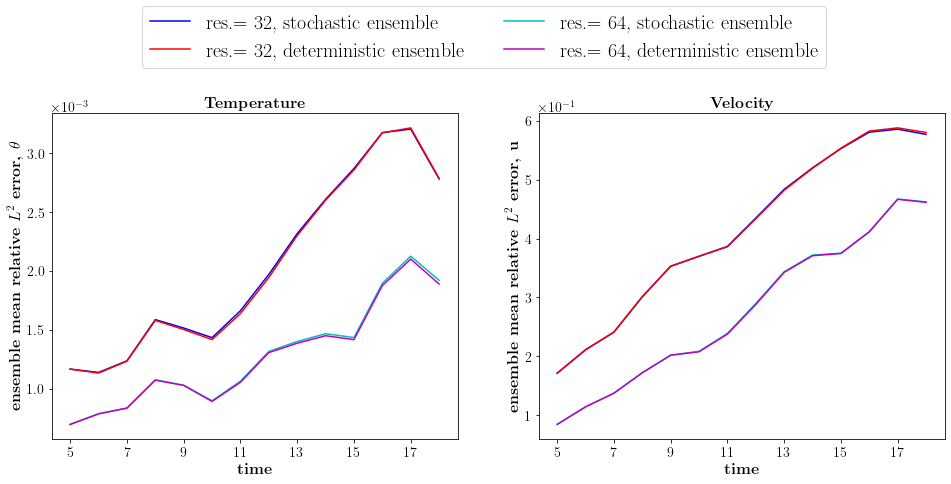

In [18]:
# plots; l2 error comparison
fig, axs = plt.subplots(1,2,figsize=(16, 6)) # one can try this also: layout="constrained"
# fig.suptitle(r'Relative $L^2$ error comparison', fontsize=16)
l_width = 0.6 # linewidth parameter
c1 = 'b' ; c2 = 'g' ; c3 = 'r' ; c4 = 'c' ; c5 = 'm'; c6 ='grey' # color list
sp = 5 # we plot data after 5 time units

axs[0].set_title(r'\bf Temperature')
axs[0].plot(time[sp:], l2_temp_mesh_32_var_90_particles_50_mean[sp:],color=c1, label=r'res.= $32$, stochastic ensemble')
axs[0].plot(time[sp:], l2_temp_mesh_32_det_ensemble_mean[sp:], color=c3, label=r'res.= $32$, deterministic ensemble')

axs[0].plot(time[sp:], l2_temp_mesh_64_var_90_particles_50_mean[sp:], color=c4, label=r'res.= $64$, stochastic ensemble')
axs[0].plot(time[sp:], l2_temp_mesh_64_det_ensemble_mean[sp:], color=c5, label=r'res.= $64$, deterministic ensemble')

axs[0].ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
axs[0].set_xlabel(r'\bf{time}')
axs[0].set_ylabel(r'\bf {ensemble mean relative} $L^2$ {error,} $\theta$')
axs[0].set_xticks(np.arange(5,19,2)) # set custom tick labels
# axs[0].legend()

axs[1].set_title(r'\bf Velocity')
axs[1].plot(time[sp:], l2_vel_mesh_32_var_90_particles_50_mean[sp:],color=c1, label=r'res.= $32$, stochastic ensemble')
axs[1].plot(time[sp:], l2_vel_mesh_32_det_ensemble_mean[sp:], color=c3, label=r'res.= $32$, deterministic ensemble')

axs[1].plot(time[sp:], l2_vel_mesh_64_var_90_particles_50_mean[sp:], color=c4, label=r'res.= $64$, stochastic ensemble')
axs[1].plot(time[sp:], l2_vel_mesh_64_det_ensemble_mean[sp:], color=c5, label=r'res.= $64$, deterministic ensemble')

axs[1].ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
axs[1].set_xlabel(r'\bf{time}')
axs[1].set_ylabel(r'\bf {ensemble mean relative} $L^2$ {error,} $\mathbf{u}$')
axs[1].set_xticks(np.arange(5,19,2)) # set custom tick labels
# axs[1].legend()

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2) 
# plt.savefig('../plots/l2_error/uq_atmo_det_ensem_vs_stoch_ensem_l2_error.pdf',bbox_inches='tight')

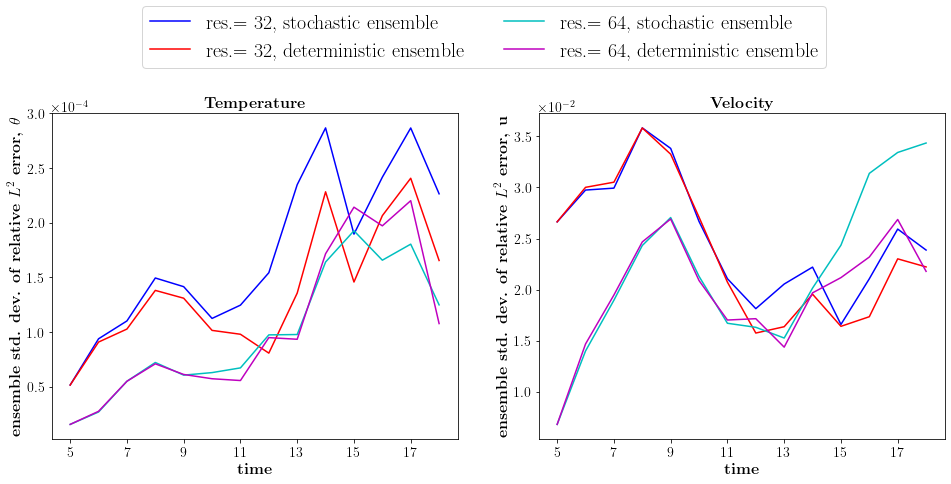

In [19]:
# plots; l2 error comparison
fig, axs = plt.subplots(1,2,figsize=(16, 6)) # one can try this also: layout="constrained"
# fig.suptitle(r'Relative $L^2$ error comparison', fontsize=16)
l_width = 0.6 # linewidth parameter
c1 = 'b' ; c2 = 'g' ; c3 = 'r' ; c4 = 'c' ; c5 = 'm'; c6 ='grey' # color list
sp = 5 # we plot data after 5 time units

axs[0].set_title(r'\bf Temperature')
axs[0].plot(time[sp:], l2_temp_mesh_32_var_90_particles_50_std[sp:],color=c1, label=r'res.= $32$, stochastic ensemble')
axs[0].plot(time[sp:], l2_temp_mesh_32_det_ensemble_std[sp:], color=c3, label=r'res.= $32$, deterministic ensemble')

axs[0].plot(time[sp:], l2_temp_mesh_64_var_90_particles_50_std[sp:], color=c4, label=r'res.= $64$, stochastic ensemble')
axs[0].plot(time[sp:], l2_temp_mesh_64_det_ensemble_std[sp:], color=c5, label=r'res.= $64$, deterministic ensemble')

axs[0].ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
axs[0].set_xlabel(r'\bf{time}')
axs[0].set_ylabel(r'\bf {ensemble std. dev. of relative} $L^2$ {error,} $\theta$')
axs[0].set_xticks(np.arange(5,19,2)) # set custom tick labels
# axs[0].legend()

axs[1].set_title(r'\bf Velocity')
axs[1].plot(time[sp:], l2_vel_mesh_32_var_90_particles_50_std[sp:],color=c1, label=r'res.= $32$, stochastic ensemble')
axs[1].plot(time[sp:], l2_vel_mesh_32_det_ensemble_std[sp:], color=c3, label=r'res.= $32$, deterministic ensemble')

axs[1].plot(time[sp:], l2_vel_mesh_64_var_90_particles_50_std[sp:], color=c4, label=r'res.= $64$, stochastic ensemble')
axs[1].plot(time[sp:], l2_vel_mesh_64_det_ensemble_std[sp:], color=c5, label=r'res.= $64$, deterministic ensemble')

axs[1].ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
axs[1].set_xlabel(r'\bf{time}')
axs[1].set_ylabel(r'\bf {ensemble std. dev. of relative} $L^2$ {error,} $\mathbf{u}$')
axs[1].set_xticks(np.arange(5,19,2)) # set custom tick labels
# axs[1].legend()

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2) 
# plt.savefig('../plots/l2_error/uq_atmo_det_ensem_vs_stoch_ensem_l2_error.pdf',bbox_inches='tight')

# One standard deviation region $L^2$ error plots

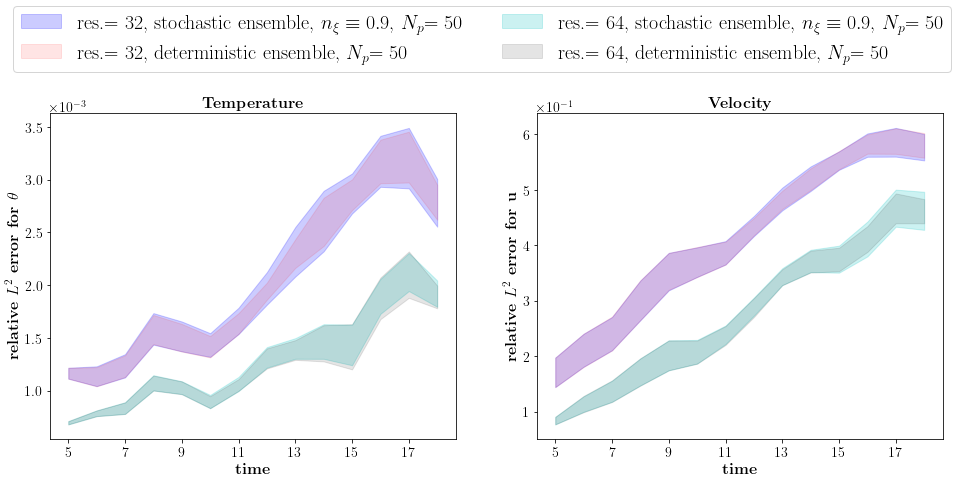

In [26]:
# plots; l2 error comparison
fig, axs = plt.subplots(1,2,figsize=(16, 6)) # one can try this also: layout="constrained"
# fig.suptitle(r'Relative $L^2$ error comparison', fontsize=16)
l_width = 0.6 # linewidth parameter
c1 = 'b' ; c2 = 'g' ; c3 = 'r' ; c4 = 'c' ; c5 = 'm'; c6 ='black' # color list
sp = 5 # we plot data after 5 time units

axs[0].set_title(r'\bf Temperature')
axs[0].fill_between(time[sp:], l2_temp_mesh_32_var_90_particles_50_std_plus[sp:], l2_temp_mesh_32_var_90_particles_50_std_minus[sp:], alpha=0.2 , color=c1, label=r'res.= $32$, stochastic ensemble, $n_{\xi} \equiv  0.9$, $N_p$= $50$')
axs[0].fill_between(time[sp:], l2_temp_mesh_32_det_ensemble_std_plus[sp:], l2_temp_mesh_32_det_ensemble_std_minus[sp:], alpha=0.1 , color=c3, label=r'res.= $32$, deterministic ensemble, $N_p$= $50$')


axs[0].fill_between(time[sp:], l2_temp_mesh_64_var_90_particles_50_std_plus[sp:], l2_temp_mesh_64_var_90_particles_50_std_minus[sp:], alpha=0.2 , color=c4, label=r'res.= $64$, stochastic ensemble, $n_{\xi} \equiv  0.9$, $N_p$= $50$')
axs[0].fill_between(time[sp:], l2_temp_mesh_64_det_ensemble_std_plus[sp:], l2_temp_mesh_64_det_ensemble_std_minus[sp:], alpha=0.1 , color=c6, label=r'res.= $64$, deterministic ensemble, $N_p$= $50$')

axs[0].ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
axs[0].set_xticks(np.arange(5,19,2)) # set custom tick labels
axs[0].set_xlabel(r'\bf{time}')
axs[0].set_ylabel(r'\bf {relative} $L^2$ {error for} $\theta$')
# axs[0].legend()

axs[1].set_title(r'\bf Velocity')
axs[1].fill_between(time[sp:],l2_vel_mesh_32_var_90_particles_50_std_plus[sp:], l2_vel_mesh_32_var_90_particles_50_std_minus[sp:], alpha = 0.2, color=c1, label=r'res.= $32$, stochastic ensemble, $n_{\xi} \equiv  0.9$, $N_p$= $50$')
axs[1].fill_between(time[sp:],l2_vel_mesh_32_det_ensemble_std_plus[sp:], l2_vel_mesh_32_det_ensemble_std_minus[sp:], alpha = 0.1, color=c3, label=r'res.= $32$, stochastic ensemble, $n_{\xi} \equiv  0.9$, $N_p$= $50$')


axs[1].fill_between(time[sp:],l2_vel_mesh_64_var_90_particles_50_std_plus[sp:], l2_vel_mesh_64_var_90_particles_50_std_minus[sp:], alpha = 0.2, color=c4, label=r'res.= $32$, stochastic ensemble, $n_{\xi} \equiv  0.9$, $N_p$= $50$')
axs[1].fill_between(time[sp:],l2_vel_mesh_64_det_ensemble_std_plus[sp:], l2_vel_mesh_64_det_ensemble_std_minus[sp:], alpha = 0.1, color=c6, label=r'res.= $32$, stochastic ensemble, $n_{\xi} \equiv  0.9$, $N_p$= $50$')

axs[1].ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
axs[1].set_xticks(np.arange(5,19,2))
axs[1].set_xlabel(r'\bf{time}')
axs[1].set_ylabel(r'\bf {relative} $L^2$ {error for} $\mathbf{u}$')
# axs[1].legend()

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2) 
plt.savefig('../plots/l2_error/uq_atmo_det_ensem_vs_stoch_ensem_l2_error.pdf',bbox_inches='tight')

# Plots of all the ensemble members

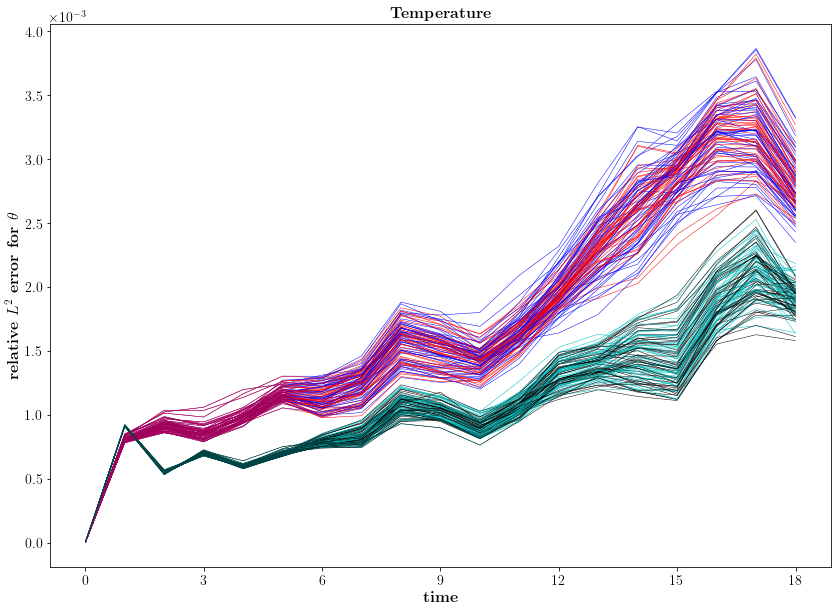

In [24]:
# plots; l2 error comparison
fig, ax = plt.subplots(figsize=(14, 10)) 
ax.set_title(r'\bf Temperature')
ax.set_ylabel(r'\bf {relative} $L^2$ {error for} $\theta$')
ax.set_xlabel(r'\bf{time}')
l_width = .5 # linewidth parameter
n_particles = 50

for j in range(n_particles):
    ax.plot(time, l2_temp_mesh_32_var_90_particles_50[:,j], linewidth=l_width, color=c1) # label=r'res.= $32$, $n_{\xi} \equiv  0.9$, $N_p$= $50$ '
    ax.plot(time, l2_temp_mesh_32_det_ensemble[:,j], linewidth=l_width, color=c3) # label=r'res.= $32$, $n_{\xi} \equiv  0.9$, $N_p$= $50$ '
    ax.plot(time,l2_temp_mesh_64_var_90_particles_50[:,j], linewidth=l_width, color=c4) # label=r'res.= $64$, $n_{\xi}\equiv 0.9$, $N_p$= $50$ '
    ax.plot(time,l2_temp_mesh_64_det_ensemble[:,j], linewidth=l_width, color=c6) # label=r'res.= $64$, $n_{\xi}\equiv 0.9$, $N_p$= $50$ '

ax.set_xticks(np.arange(0,19,3))
ax.ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)

# handles, labels = ax.get_legend_handles_labels()
# fig.legend(handles, labels,loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=2)
# ax.legend()

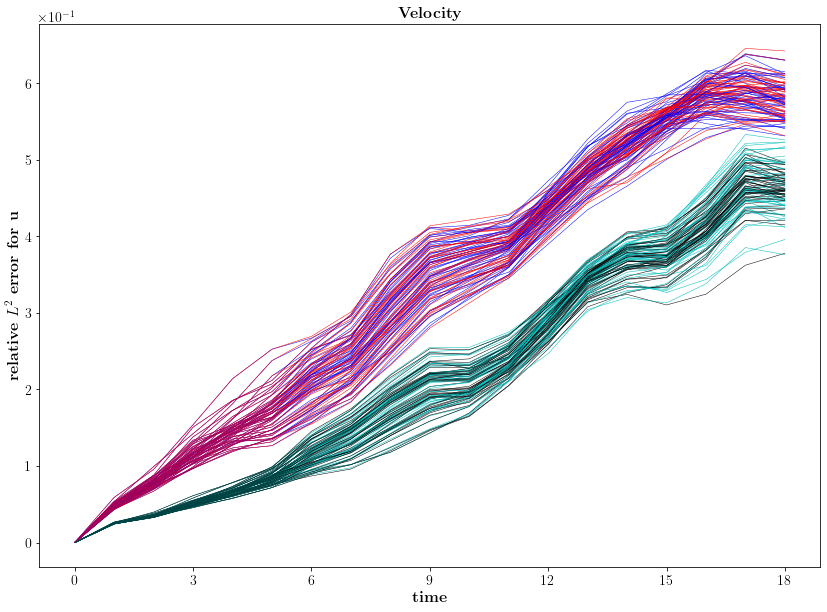

In [25]:
# plots; l2 error comparison
fig, ax = plt.subplots(figsize=(14, 10)) 
ax.set_title(r'\bf Velocity')
ax.set_ylabel(r'\bf {relative} $L^2$ {error for} $\mathbf{u}$')
ax.set_xlabel(r'\bf{time}')
l_width = .5 # linewidth parameter
n_particles = 50

for j in range(n_particles):
    ax.plot(time, l2_vel_mesh_32_var_90_particles_50[:,j], linewidth=l_width, color=c1) # label=r'res.= $32$, $n_{\xi} \equiv  0.9$, $N_p$= $50$ '
    ax.plot(time, l2_vel_mesh_32_det_ensemble[:,j], linewidth=l_width, color=c3) # label=r'res.= $32$, $n_{\xi} \equiv  0.9$, $N_p$= $50$ '
    ax.plot(time,l2_vel_mesh_64_var_90_particles_50[:,j], linewidth=l_width, color=c4) # label=r'res.= $64$, $n_{\xi}\equiv 0.9$, $N_p$= $50$ '
    ax.plot(time,l2_vel_mesh_64_det_ensemble[:,j], linewidth=l_width, color=c6) # label=r'res.= $64$, $n_{\xi}\equiv 0.9$, $N_p$= $50$ '

ax.set_xticks(np.arange(0,19,3))
ax.ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)

# handles, labels = ax.get_legend_handles_labels()
# fig.legend(handles, labels,loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=2)
# ax.legend()

# Minimum relative $L^2$ error

In [49]:
from numpy import linalg as LA

Resolution: $32$

In [50]:
min_temp_32 = np.zeros(n_particles)
min_vel_32 = np.zeros(n_particles)
for j in range(n_particles):
    min_temp_32[j] = np.mean(l2_temp_mesh_32_det_ensemble[:,j])
    min_vel_32[j] = np.mean(l2_vel_mesh_32_det_ensemble[:,j])

print(f'the particle which has the minimum tempearture L2 error is {np.argmin(min_temp_32)}')
print(f'the particle which has the minimum vel. L2 error is {np.argmin(min_vel_32)}')

the particle which has the minimum tempearture L2 error is 5
the particle which has the minimum vel. L2 error is 29


Resolution: $64$

In [52]:
min_temp_64 = np.zeros(n_particles)
min_vel_64 = np.zeros(n_particles)
for j in range(n_particles):
    min_temp_64[j] = np.mean(l2_temp_mesh_64_det_ensemble[:,j])
    min_vel_64[j] = np.mean(l2_vel_mesh_64_det_ensemble[:,j])

print(f'the particle which has the minimum tempearture L2 error is {np.argmin(min_temp_64)}')
print(f'the particle which has the minimum vel. L2 error is {np.argmin(min_vel_64)}')

the particle which has the minimum tempearture L2 error is 37
the particle which has the minimum vel. L2 error is 17


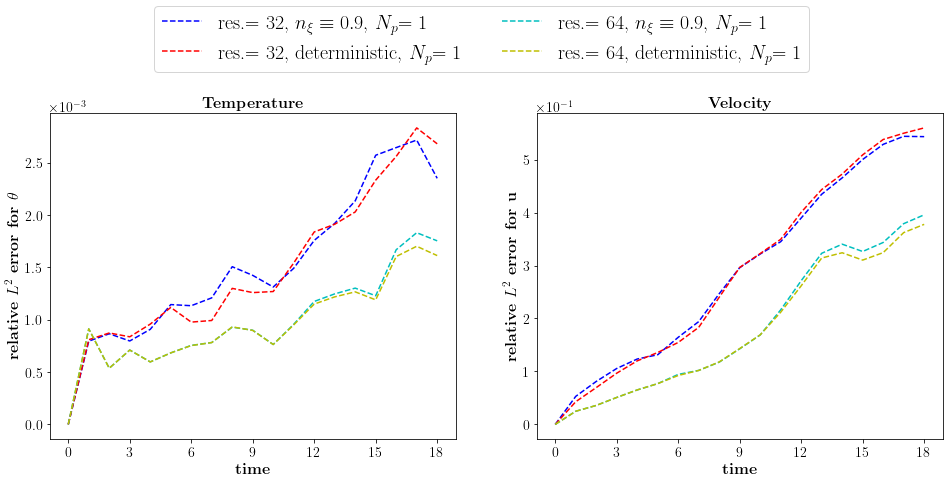

In [55]:
# plots; l2 error comparison
fig, axs = plt.subplots(1,2,figsize=(16, 6)) # one can try this also: layout="constrained"
# fig.suptitle(r'Relative $L^2$ error comparison', fontsize=16)
l_width = 0.6 # linewidth parameter
c1 = 'b' ; c2 = 'g' ; c3 = 'r' ; c4 = 'c' ; c5 = 'm'; c6 ='y' # color list
axs[0].set_title(r'\bf Temperature')
axs[0].plot(time, l2_temp_mesh_32_var_90_particles_50[:,47],'--', color = c1, label=r'res.= $32$, $n_{\xi} \equiv  0.9$, $N_p$= $1$')
axs[0].plot(time, l2_temp_mesh_32_det_ensemble[:,5],'--', color = c3, label=r'res.= $32$, deterministic, $N_p$= $1$')



axs[0].plot(time,l2_temp_mesh_64_var_90_particles_50[:,37],'--', color = c4, label=r'res.= $64$, $n_{\xi}\equiv 0.9$, $N_p$= $1$')
axs[0].plot(time,l2_temp_mesh_64_det_ensemble[:,37],'--', color = c6, label=r'res.= $64$, deterministic, $N_p$= $1$')

axs[0].ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
axs[0].set_xticks(np.arange(0,19,3)) # set custom tick labels
axs[0].set_xlabel(r'\bf{time}')
axs[0].set_ylabel(r'\bf {relative} $L^2$ {error for} $\theta$')
# axs[0].legend()

axs[1].set_title(r'\bf Velocity')
axs[1].plot(time, l2_vel_mesh_32_var_90_particles_50[:,12], '--', color = c1, label=r'res.= $32$, $n_{\xi} \equiv  0.9$, $N_p$= $1$') 
axs[1].plot(time, l2_vel_mesh_32_det_ensemble[:,29],'--', color = c3, label=r'res.= $32$, deterministic, $N_p$= $1$')


axs[1].plot(time,l2_vel_mesh_64_var_90_particles_50[:,17], '--', color = c4, label=r'res.= $64$, $n_{\xi}\equiv 0.9$, $N_p$= $1$')
axs[1].plot(time, l2_vel_mesh_64_det_ensemble[:,17],'--', color = c6, label=r'res.= $64$, deterministic, $N_p$= $1$')

axs[1].ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
axs[1].set_xticks(np.arange(0,19,3))
axs[1].set_xlabel(r'\bf{time}')
axs[1].set_ylabel(r'\bf {relative} $L^2$ {error for} $\mathbf{u}$')
# axs[1].legend()

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2) 
